# **HackerEarth Prediction of Churn risk score.**

### **A Machine Learning Project**
#### by Olutayo Tosin OLADEINBO
   ***
### **Phase 3 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Data Overview
 
***
### **1. Project Overview**
***
### **About Dataset**
##### **Problem Statement**
Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

**User demographic information**

Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

**Task**

Your task is to predict the churn score for a website based on the features provided in the dataset.

Data description
The dataset folder contains the following files:

train.csv: 36992 x 25
test.csv: 19919 x 24
sample_submission.csv: 5 x 2

Evaluation metric
         `score = 100 x metrics.f1_score(actual, predicted, average="macro")`

***
### **2. Notebook setup - Libraries and data imports**
***
Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from datetime import date

#### **Data Overview**

**Reading the data:**

In [ ]:
#reading the data
data = pd.read_csv("train.csv")
test_data = pd.read_csv("train.csv")

**Preview:**

In [ ]:
print('Preview of data')
data.head()

Preview of data


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


**Shape of data:**

In [ ]:
print('shape of data')
data.shape

shape of data


(36992, 25)

**List of columns:**

In [ ]:
print("get the column names")
data.columns

get the column names


Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

**Statistical summary of numerical columns:**

In [ ]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

#### **Data cleaning**
***
**Inspection of avg_frequency_login_days for posible anomaly:**

From findings, the column contains 'int' and 'str' values, and as a result was not considered by the describe function above.

In [ ]:
#Detection of str value from avg_frequency_login_days column
print(set([data for data in data['avg_frequency_login_days'] for a in data if a \
     not in ['0','1','2','3','4','5','6','7','8','9','.','-']]))

{'Error'}


In [ ]:
#replacing error(str) values with 0
data = data.replace({'avg_frequency_login_days': {'Error': 0}})
#converting to integer
data['avg_frequency_login_days'] = data['avg_frequency_login_days'].astype('float64')

**Check and removal of negative values (anomalous values):**

In [ ]:
#code to check for the negative values in the Dataframe we noticed from the describe function
anom = data[['avg_time_spent','days_since_last_login','points_in_wallet','churn_risk_score','avg_frequency_login_days']].min(axis=0)
anom[anom < 0]

avg_time_spent             -2814.109110
days_since_last_login       -999.000000
points_in_wallet            -760.661236
churn_risk_score              -1.000000
avg_frequency_login_days     -43.652702
dtype: float64

In [ ]:
#code to remove negative values in the avg_time_spent column
data = data.drop(data[data['avg_time_spent'] < 0].index).copy()

#code to remove negative values in the avg_time_spent column
data = data.drop(data[data['days_since_last_login'] < 0].index).copy()

#code to remove negative values in the avg_time_spent column
data = data.drop(data[data['points_in_wallet'] < 0].index).copy()

#code to remove negative values in the avg_time_spent column
data = data.drop(data[data['churn_risk_score'] < 0].index).copy()

#code to remove negative values in the avg_time_spent column
new_data = data.drop(data[data['avg_frequency_login_days'] < 0].index).copy()

**Duplicate check:**

In [ ]:
print('counting duplicates')
len(new_data) - len(new_data.drop_duplicates())

counting duplicates


0

**Getting the unique values in each columns to detect categorical columns**

In [ ]:
#function to get the unique values per column
def unique(new_data):
  count = []
  columns = []
  for col in new_data.columns:
    count_unique = len(new_data[col].unique())
    columns.append(col)
    count.append(count_unique)
  d = {'columns': columns, 'Unique count':count}
  return pd.DataFrame(d)
unique(new_data)

,columns,Unique count
0,customer_id,31618
1,Name,31618
2,age,55
3,gender,3
4,security_no,31618
5,region_category,4
6,membership_category,6
7,joining_date,1096
8,joined_through_referral,3
9,referral_id,10294


**Removing Unused columns**

In [ ]:
#dropping unused columns
new_data = new_data.drop(['security_no', 'Name', 'customer_id','referral_id'], axis =1).copy()

### **Feature Engineering**

In [ ]:
#converting to datatime format
new_data['joining_date'] = new_data['joining_date'].apply(pd.to_datetime)

In [ ]:
# Getting the number of days customer has spent with the company

#code to convert from time stamp in days to integer
new_data['Days_w_com'] = (new_data['joining_date'] - new_data['joining_date'].min())

#convert to string
new_data['Days_w_com'] = new_data['Days_w_com'].astype('str')

#split and pick only integer values
new_data['Days_w_com'] = new_data['Days_w_com'].str.split(" ", n=1, expand=True)[0]

#replace the latest value with 0
new_data['Days_w_com'] = new_data['Days_w_com'].replace('NaT', 0)

#convert to integer
new_data['Days_w_com'] = new_data['Days_w_com'].astype('int')

In [ ]:
#gettint the hours from last time visit
last_timv = new_data['last_visit_time'].str.split(r":", expand=True)

#fill Nan values with zero before computing hour
new_data['hour'] = last_timv[0].fillna(0).astype('int')
new_data['min'] = last_timv[1].fillna(0).astype('int')
new_data['sec'] = last_timv[2].fillna(0).astype('int')
new_data['hour'] = new_data['hour'] + (new_data['min']/60) + new_data['sec']/3600


In [ ]:
new = new_data.drop(['joining_date','min','sec','last_visit_time'], axis = 1).copy()
new = new.replace({'medium_of_operation': {'?': 'Both'}})

**Inspecting Categorical features**

In [ ]:
#columns with minimum category
min_cat_cols = ['gender', 'region_category', 'membership_category',
                'joined_through_referral','preferred_offer_types',
                'medium_of_operation', 'internet_option', 'complaint_status',
                'used_special_discount','feedback','past_complaint',
                'offer_application_preference','churn_risk_score']

In [ ]:
for col in min_cat_cols:
  df = pd.DataFrame()
  df["{}".format(col)]= new_data[col].value_counts()
  print(df)

         gender
F         15833
M         15740
Unknown      45
         region_category
Town               12092
City               10846
Village             4018
                     membership_category
Basic Membership                    6582
No Membership                       6542
Gold Membership                     5831
Silver Membership                   5140
Premium Membership                  3802
Platinum Membership                 3721
     joined_through_referral
No                     13570
Yes                    13400
?                       4648
                          preferred_offer_types
Gift Vouchers/Coupons                     10542
Credit/Debit Card Offers                  10491
Without Offers                            10341
            medium_of_operation
Smartphone                11877
Desktop                   11853
?                          4624
Both                       3264
             internet_option
Wi-Fi                  10582
Fiber_Optic            

### **EDA**

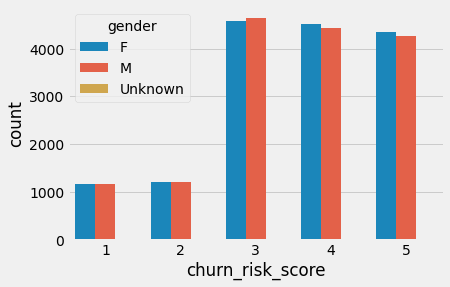

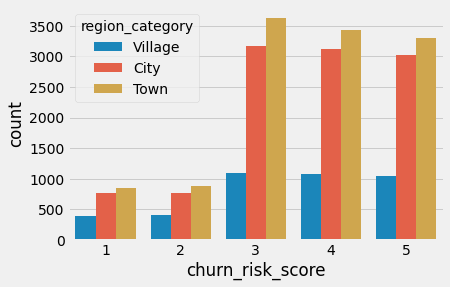

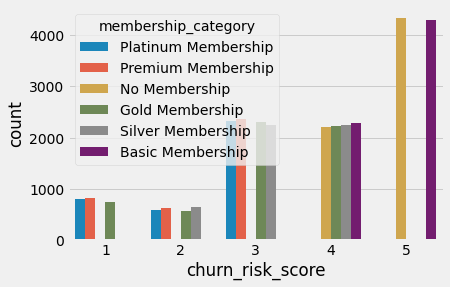

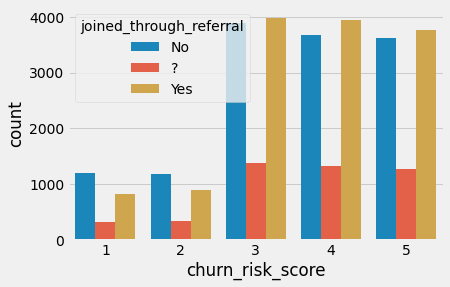

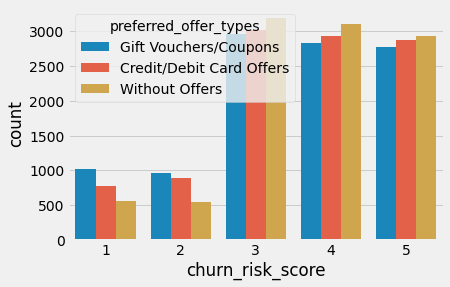

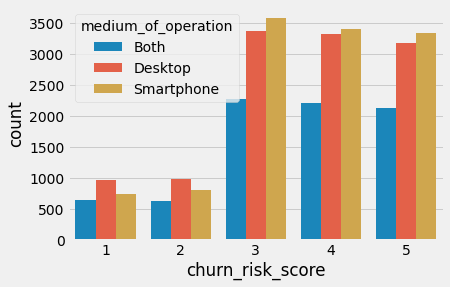

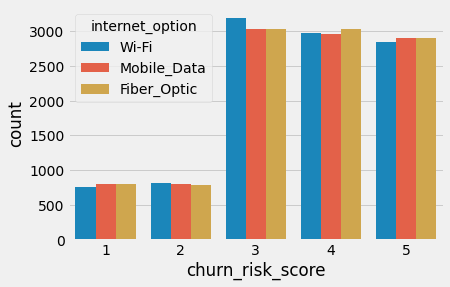

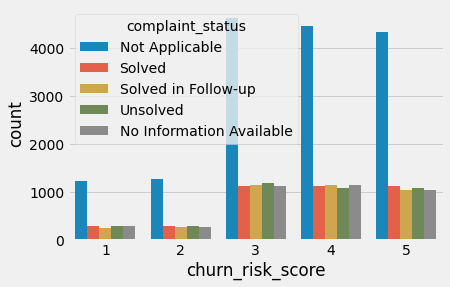

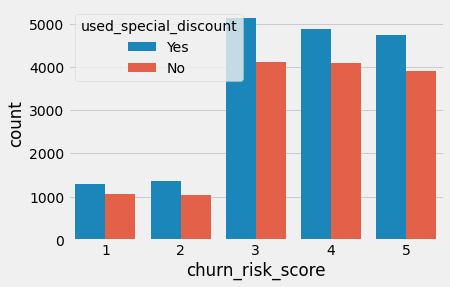

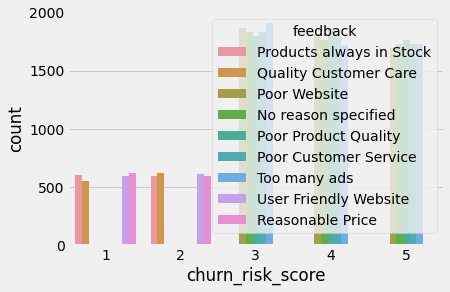

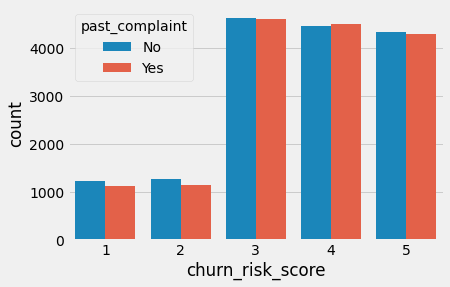

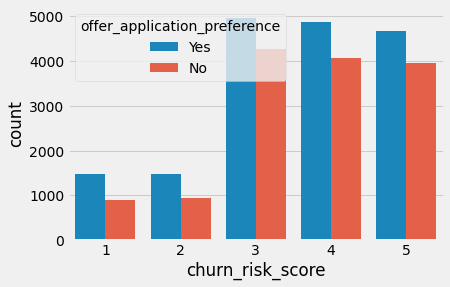

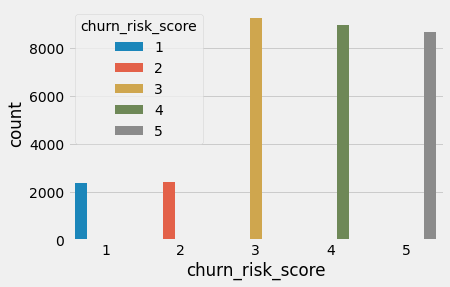

In [ ]:
#asigning target column as category before visualization and model building      
new['churn_risk_score'] = new['churn_risk_score'].astype('category')

plt.style.use('fivethirtyeight')
for col in min_cat_cols:
  sns.countplot(x='churn_risk_score', data = new, hue = col)
  plt.show()

**Handling Categorical columns** 

In [ ]:
# Numerical variables
num_col = [col for col in new.columns if new[col].dtype != "O" and new[col].dtype != 'category']
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'Days_w_com',
 'hour']

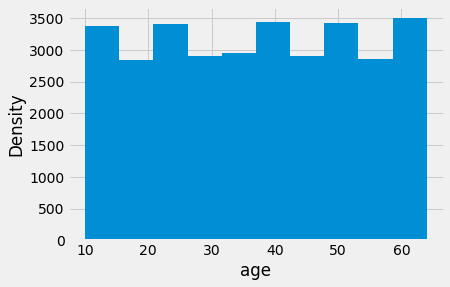

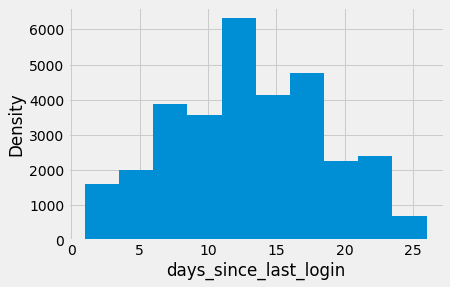

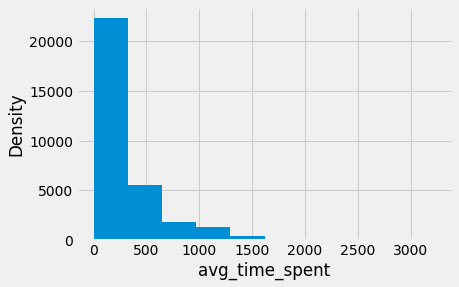

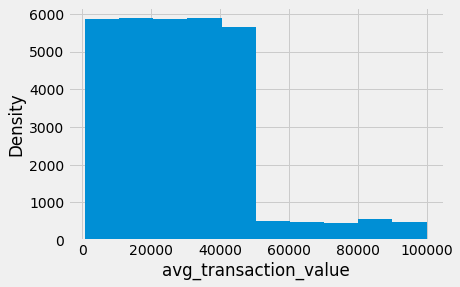

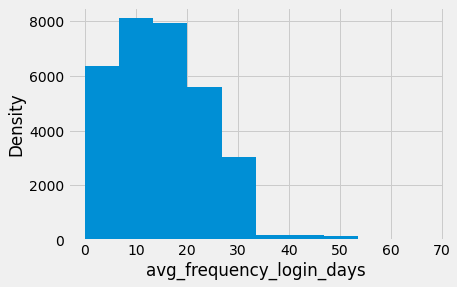

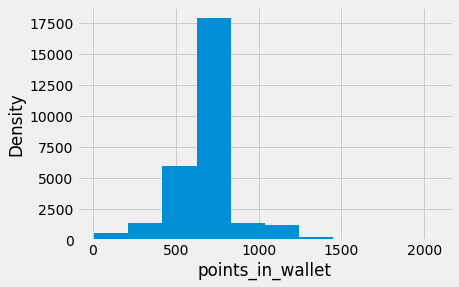

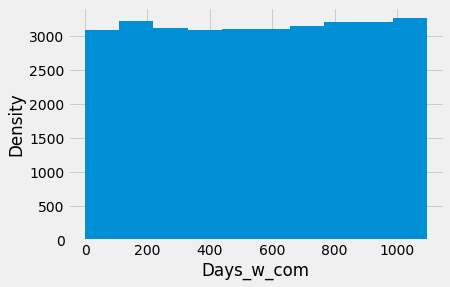

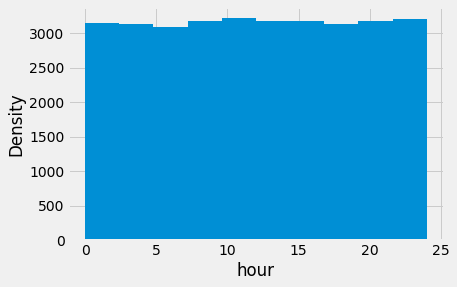

In [ ]:
for var in [col for col in num_col if col != 'churn_risk_score']:
  plt.hist(new[var])
  plt.xlabel(var)
  plt.ylabel('Density')
  plt.show()

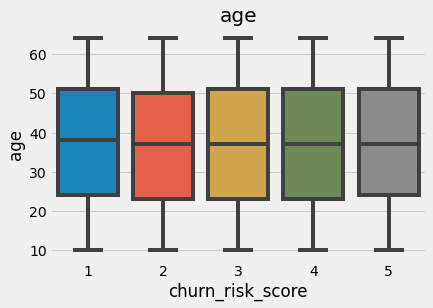

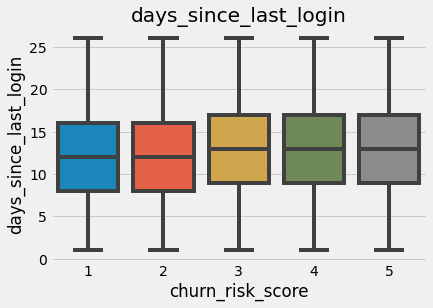

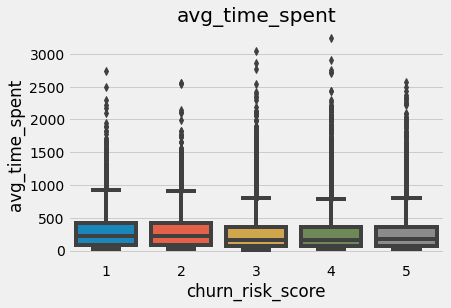

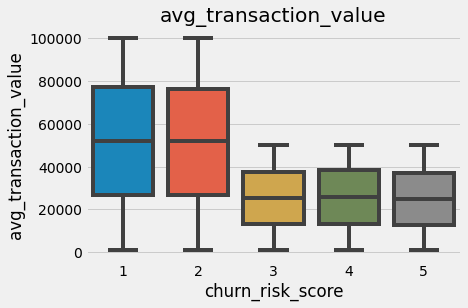

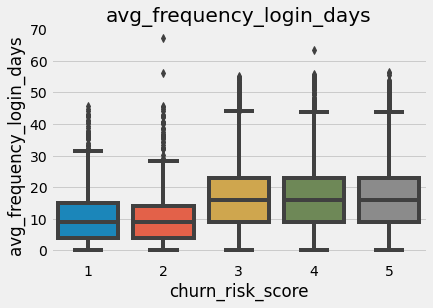

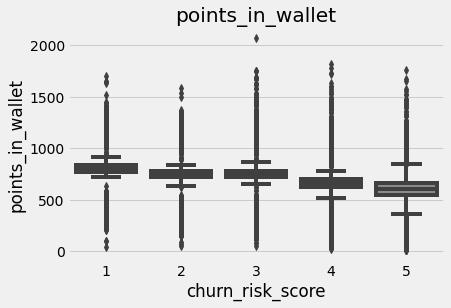

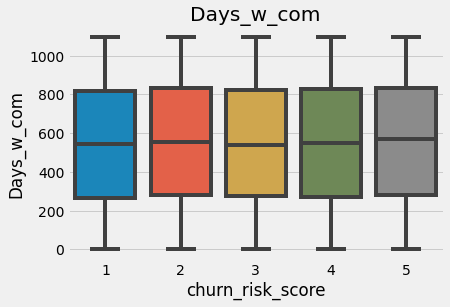

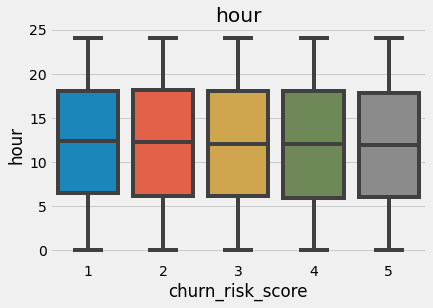

In [ ]:
for feature in num_col:
    if feature != 'churn_risk_score':
        sns.boxplot(x ='churn_risk_score', y = feature, data = new)
        plt.title(feature)
        plt.show()

In [ ]:
#code to get the dataframe with unknown gender
unknown = new[new['gender']== 'Unknown']

#code to divide the unkown into two equal part
index1= new[new['gender']== 'Unknown'][:len(unknown) // 2].index
index2= new[new['gender']== 'Unknown'][len(unknown) // 2 :].index
#code for allocating  Each half
new.loc[index1,'gender'] =  'M'

new.loc[index2,'gender'] =  'F'

#code to get the dataframe with unknown referral status
Un_ref = new[new['joined_through_referral']== '?']

#code to divide the unkown into two equal part
index1= new[new['joined_through_referral']== '?'][:len(Un_ref) // 2].index
index2= new[new['joined_through_referral']== '?'][len(Un_ref) // 2 :].index

#code for allocating  Each half to Yes and No
new.loc[index1,'joined_through_referral'] =  'Yes'
new.loc[index2,'joined_through_referral'] =  'No'

In [ ]:
#replacing values in columns for better understanding and reduced dimension
new = new.replace({'complaint_status': {'Solved in Follow-up': 'Solved', 
                                        'No Information Available': 'Not Applicable'}})

new = new.replace({'feedback': {'Poor Product Quality': 'Bad',
                                'Poor Website': 'Bad',
                                'Too many ads': 'Bad',
                                'Poor Customer Service': 'Bad',
                                'Reasonable Price': 'Good',
                                'User Friendly Website': 'Good',
                                'Products always in Stock': 'Good',
                                'Quality Customer Care': 'Good',
                                'No reason specified': 'Good'
                                }})

new = new.replace({'medium_of_operation': {'?': 'Both'}})

new = new.replace({'preferred_offer_types': {'Gift Vouchers/Coupons': 'Offer',
                                             'Credit/Debit Card Offers': 'Offer'}})

In [ ]:
#Encoding Binary columns
new['gender'] = new['gender'].apply(lambda x: 1 if x =='M' else (0 if x =='F' else None)) 
new['joined_through_referral'] = new['joined_through_referral'].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))
new['feedback'] = new['feedback'].apply(lambda x: 1 if x =='Good' else (0 if x =='Bad' else None)) 
new['used_special_discount'] = new['used_special_discount'].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None)) 
new['past_complaint'] = new['past_complaint'].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None)) 
new['offer_application_preference'] = new['offer_application_preference'].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))
new['preferred_offer_types'] = new['preferred_offer_types'].apply(lambda x: 1 if x =='Offer' else (0 if x =='Without Offers' else None)) 

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31618 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           31618 non-null  int64   
 1   gender                        31618 non-null  int64   
 2   region_category               26956 non-null  object  
 3   membership_category           31618 non-null  object  
 4   joined_through_referral       31618 non-null  int64   
 5   preferred_offer_types         31374 non-null  float64 
 6   medium_of_operation           31618 non-null  object  
 7   internet_option               31618 non-null  object  
 8   days_since_last_login         31618 non-null  int64   
 9   avg_time_spent                31618 non-null  float64 
 10  avg_transaction_value         31618 non-null  float64 
 11  avg_frequency_login_days      31618 non-null  float64 
 12  points_in_wallet              28635 non-null  

In [ ]:
new = new.replace({'region_category': {'City': 3, 'Town': 2, 'Village':1}})

In [ ]:
new = new.replace({'membership_category': {'No Membership': 0, 'Basic Membership': 1,
                                           'Premium Membership':2,'Silver Membership':3,
                                           'Silver Membership':4,'Gold Membership':5,
                                           'Platinum Membership':6}})

In [ ]:
#filling the null values

In [ ]:
new= new.fillna({'region_category' : 2,'points_in_wallet' : new['points_in_wallet'].mean(),
                     'preferred_offer_types' : 0})

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31618 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           31618 non-null  int64   
 1   gender                        31618 non-null  int64   
 2   region_category               31618 non-null  float64 
 3   membership_category           31618 non-null  int64   
 4   joined_through_referral       31618 non-null  int64   
 5   preferred_offer_types         31618 non-null  float64 
 6   medium_of_operation           31618 non-null  object  
 7   internet_option               31618 non-null  object  
 8   days_since_last_login         31618 non-null  int64   
 9   avg_time_spent                31618 non-null  float64 
 10  avg_transaction_value         31618 non-null  float64 
 11  avg_frequency_login_days      31618 non-null  float64 
 12  points_in_wallet              31618 non-null  

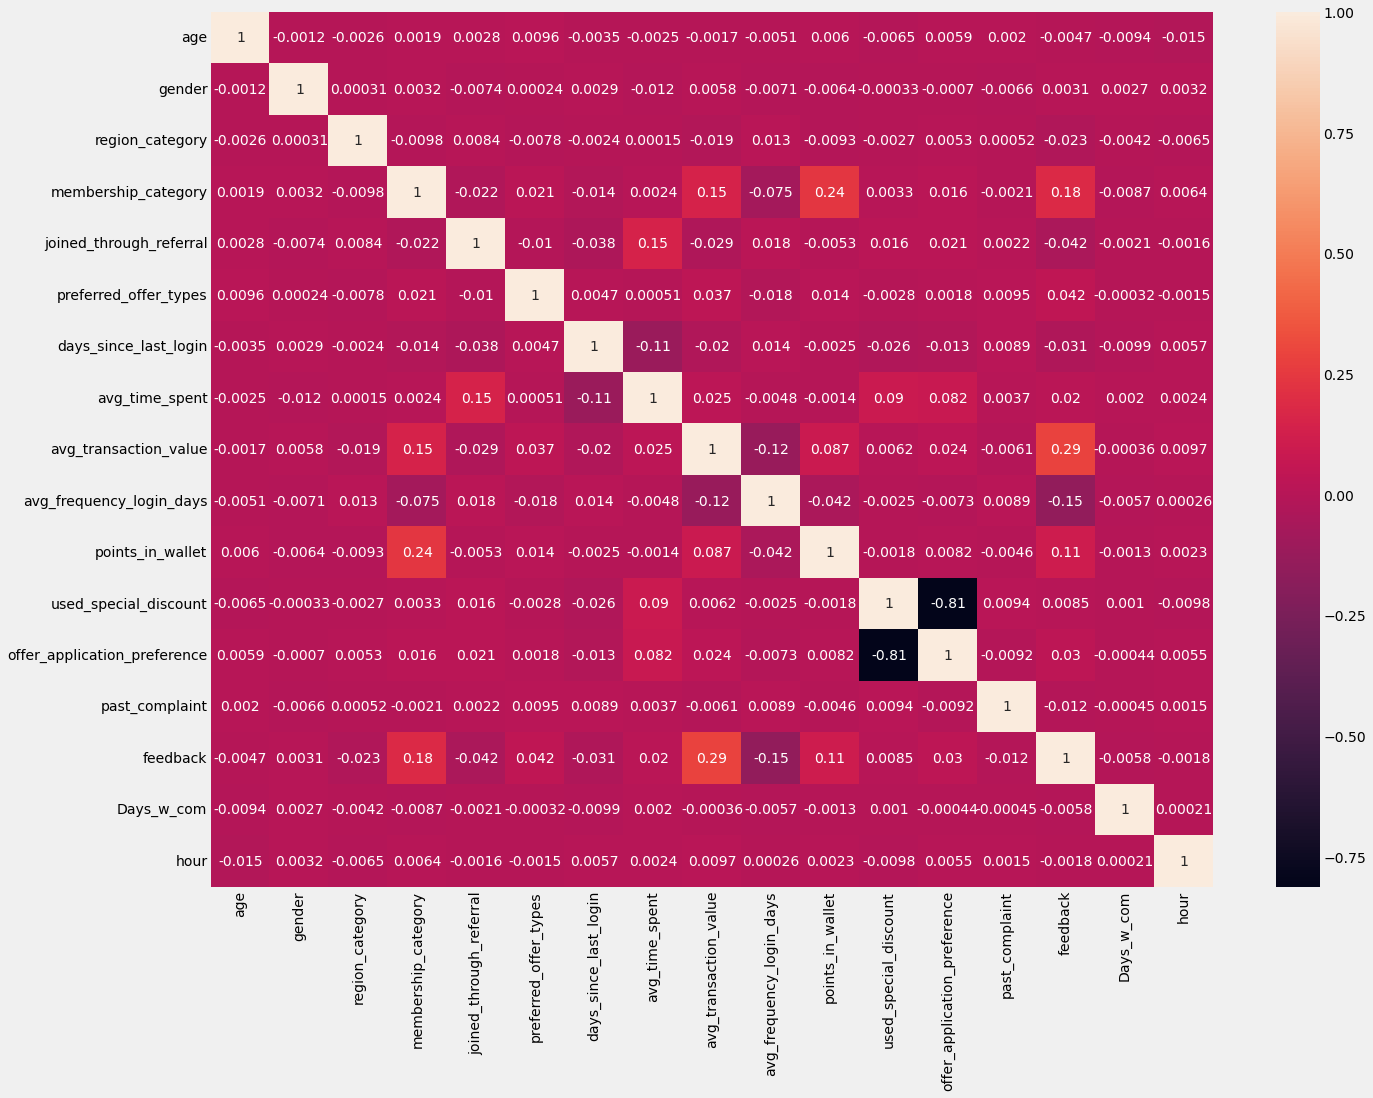

In [ ]:
plt.figure(figsize= (20,15))
sns.heatmap(new.corr(), annot= True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
# fitting encoder ti region ctegory
ord1.fit([new['region_category']])
# transforming the column after fitting
new["region_category"]= ord1.fit_transform(new[["region_category"]])

ord2 = OrdinalEncoder()
# fitting encoder ti membership ctegory
ord2.fit([new['membership_category']])
# transforming the column after fitting
new["membership_category"]= ord2.fit_transform(new[["membership_category"]])

In [ ]:
#Encoding with pandas get dummies
new = pd.get_dummies(new, prefix = ['com_stat','int_opt','med_of_op'], 
                     columns = ['complaint_status','internet_option','medium_of_operation'])

In [ ]:
new.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,...,hour,com_stat_Not Applicable,com_stat_Solved,com_stat_Unsolved,int_opt_Fiber_Optic,int_opt_Mobile_Data,int_opt_Wi-Fi,med_of_op_Both,med_of_op_Desktop,med_of_op_Smartphone
0,18,0,0.0,5.0,0,1.0,17,300.63,53005.25,17.0,...,16.133889,1,0,0,0,0,1,1,0,0
1,32,0,2.0,2.0,1,1.0,16,306.34,12838.38,10.0,...,12.636944,0,1,0,0,1,0,0,1,0
2,44,0,1.0,0.0,1,1.0,14,516.16,21027.00,22.0,...,22.889167,0,1,0,0,0,1,0,1,0
3,37,1,2.0,0.0,1,1.0,11,53.27,25239.56,6.0,...,15.963889,0,0,1,0,1,0,0,1,0
4,31,0,2.0,0.0,0,1.0,20,113.13,24483.66,16.0,...,15.778889,0,1,0,0,1,0,0,0,1


In [ ]:
corr = new.corr()

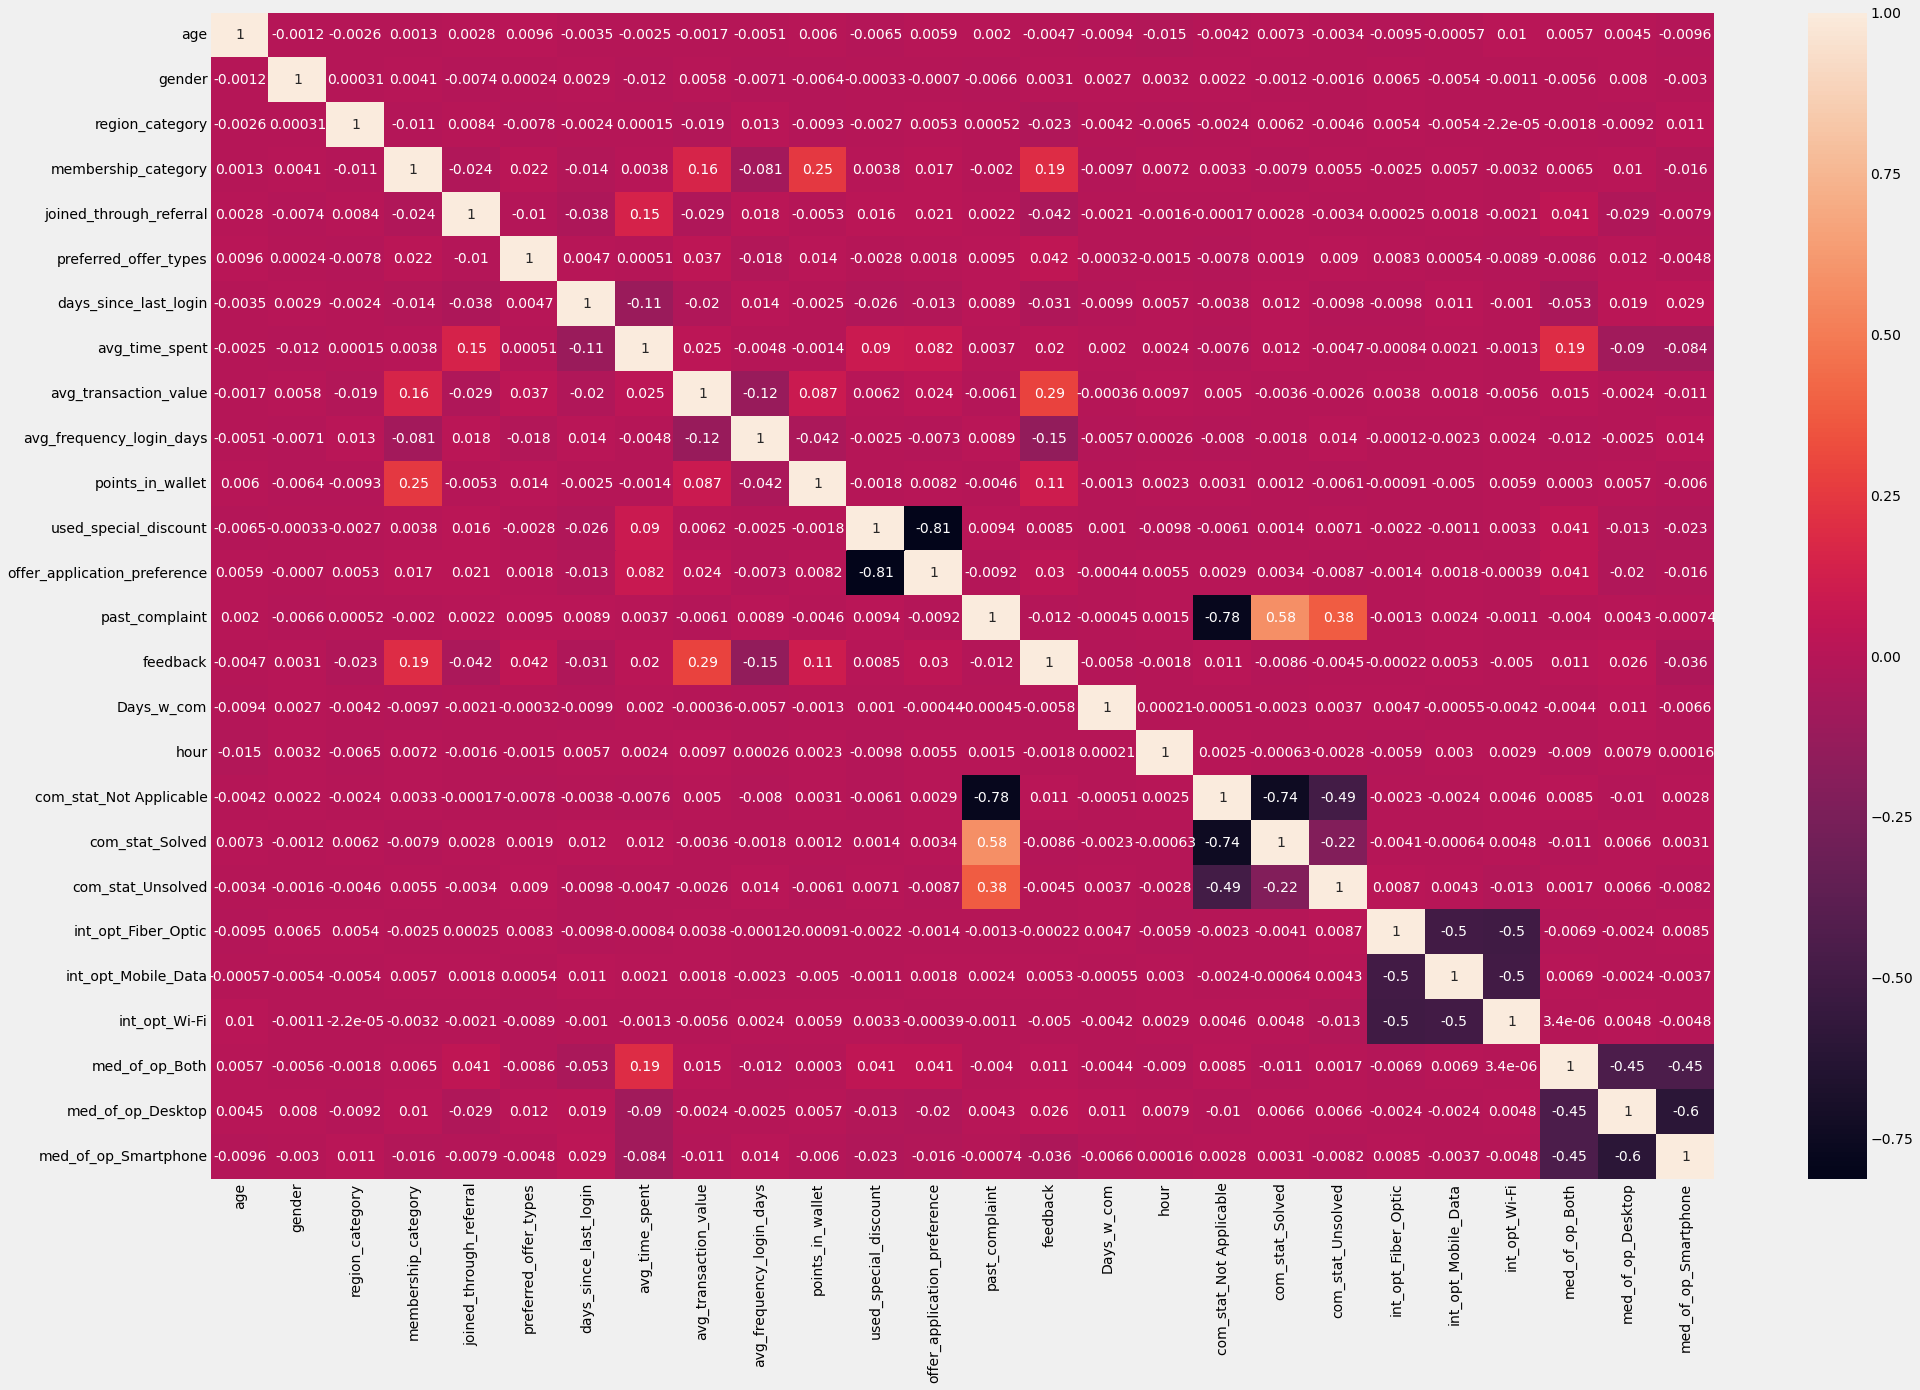

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr #for random seed
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve,cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import feature_selection as fs
from sklearn import model_selection as ms
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from math import sqrt
from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings('ignore')
import random
#for maintaining randomness
random_state = 1

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31618 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           31618 non-null  int64   
 1   gender                        31618 non-null  int64   
 2   region_category               31618 non-null  float64 
 3   membership_category           31618 non-null  float64 
 4   joined_through_referral       31618 non-null  int64   
 5   preferred_offer_types         31618 non-null  float64 
 6   days_since_last_login         31618 non-null  int64   
 7   avg_time_spent                31618 non-null  float64 
 8   avg_transaction_value         31618 non-null  float64 
 9   avg_frequency_login_days      31618 non-null  float64 
 10  points_in_wallet              31618 non-null  float64 
 11  used_special_discount         31618 non-null  int64   
 12  offer_application_preference  31618 non-null  

In [ ]:
new['churn_risk_score'] = new['churn_risk_score'].astype('category')
ft_cols = ['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
        'Days_w_com', 'hour', 'com_stat_Not Applicable',
       'com_stat_Solved', 'com_stat_Unsolved', 'int_opt_Fiber_Optic',
       'int_opt_Mobile_Data', 'int_opt_Wi-Fi', 'med_of_op_Both',
       'med_of_op_Desktop', 'med_of_op_Smartphone']
lb_col = ['churn_risk_score']

features = np.array(new[ft_cols])
label = np.array(new[lb_col]).ravel()

#Data splitting using sklearn train_test_split function
ft_train,ft_test,lb_train,lb_test = train_test_split(features,label,test_size=0.3
                                                     ,shuffle = True, random_state= random_state)



In [ ]:
#since RF are not affected by data scale, we will not scale yet

# Set 8 folds for cross validation for the feature selection
nr.seed(5)
folds = ms.KFold(n_splits=8, shuffle = True, random_state=random_state)

# Define the model
RFR_selector = RandomForestClassifier(random_state=random_state) 

# Define an objects for a model for RFECV (recursive feature elimination with CV)
nr.seed(5)
selector = fs.RFECV(estimator = RFR_selector, cv = folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(ft_train, np.ravel(lb_train))
selector.support_

# print the important features and thier rank
ranks_transform = list(np.transpose(selector.ranking_))
selected_features = [i for i,j in zip(ft_cols,ranks_transform) if j==1]

print("Feature ranking after RFECV:")
print(selector.ranking_)

print("Selected features:")
print(selected_features)


In [ ]:
ft_cols = ['age', 'gender', 'region_category', 'membership_category',
           'joined_through_referral', 'preferred_offer_types', 
           'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 
           'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 
           'offer_application_preference', 'past_complaint', 'feedback', 'Days_w_com', 
           'hour', 'med_of_op_Smartphone']
lb_col = ['churn_risk_score']
features = new[ft_cols]
label = np.array(new[lb_col]).ravel()

#Data splitting using sklearn train_test_split function
ft_train,ft_test,lb_train,lb_test = train_test_split(features,label,test_size=0.3
                                                     ,shuffle = True, random_state= random_state)

scalers = MinMaxScaler()
ft_train_s = scalers.fit_transform(ft_train)
ft_test_s = scalers.transform(ft_test)

In [ ]:
nr.seed(5)

KNR = KNeighborsClassifier()

# takes long----> best parameters used below
#k_parameters = {'n_neighbors': np.arange(1,15,1)}
#KNR_cv_model = GridSearchCV(KNR, k_parameters, cv = 5)

#Fitting the KNR model to the dataset
#KNR_cv_model.fit(ft_train_s, lb_train)

#new model
KNR_tuned = KNeighborsClassifier(n_neighbors=14)
KNR_tuned.fit(ft_train_s, lb_train)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
# Test the model
test = lb_test
predictions = KNR_tuned.predict(ft_test_s)
print('Tuned KNeighborsRegressor')

def conf_mat(test, prediction):
  from sklearn.metrics import confusion_matrix
  import seaborn as sn

  print(confusion_matrix(test, predictions))


conf_mat(test, predictions)
score = 100 * f1_score(test, predictions, average="macro")
print('Score: {}'.format(score))

Tuned KNeighborsRegressor
[[ 296  239  133   36    9]
 [ 272  274  104   38   22]
 [ 120  122 1874  479  165]
 [  76   78 1002  505 1035]
 [  23   34   87  548 1915]]
Score: 46.00310340166558


In [ ]:
MLP = MLPClassifier(max_iter=500)

# takes long----> best parameters used below
#param_list = {"hidden_layer_sizes": [1,2,3,5,8], "solver": ["lbfgs", "sgd", "adam"]}
#MLP_CV = GridSearchCV(estimator=MLP,cv=5, param_grid=param_list)

#MLP_CV.fit(ft_train_s, lb_train)

In [ ]:
MLP_tuned = MLPClassifier(hidden_layer_sizes = 8, solver= 'lbfgs')
MLP_tuned.fit(ft_train_s, lb_train)
# Test the model
test = lb_test
predictions2 = MLP_tuned.predict(ft_test_s)
print('Tuned MLP')

conf_mat(test, predictions2)
score = 100 * f1_score(test, predictions2, average="macro")
print('Score: {}'.format(score))

Tuned MLP
[[ 296  239  133   36    9]
 [ 272  274  104   38   22]
 [ 120  122 1874  479  165]
 [  76   78 1002  505 1035]
 [  23   34   87  548 1915]]
Score: 51.717351235011876


### **Using Deep Learning**

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(16, input_shape=(18,), activation='relu'),
                          keras.layers.Dense(8, input_shape=(18,), activation='relu'),
                          keras.layers.Dense(6, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(ft_train_s, lb_train, epochs=1000)

Epoch 1/1000
692/692 [==============================] - 2s 2ms/step - loss: 1.2530 - accuracy: 0.4260
Epoch 2/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8950 - accuracy: 0.5215
Epoch 3/1000
692/692 [==============================] - 1s 2ms/step - loss: 0.8721 - accuracy: 0.5260
Epoch 4/1000
692/692 [==============================] - 1s 2ms/step - loss: 0.8606 - accuracy: 0.5310
Epoch 5/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8533 - accuracy: 0.5369
Epoch 6/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8471 - accuracy: 0.5399
Epoch 7/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8426 - accuracy: 0.5465
Epoch 8/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8379 - accuracy: 0.5443
Epoch 9/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8331 - accuracy: 0.5449
Epoch 10/1000
692/692 [==============================] - 1s 2ms/step - loss: 0.824

In [ ]:
model.evaluate(ft_test_s, lb_test)

297/297 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.7274


[0.48832592368125916, 0.7273877263069153]

Score: 70.1282289498337


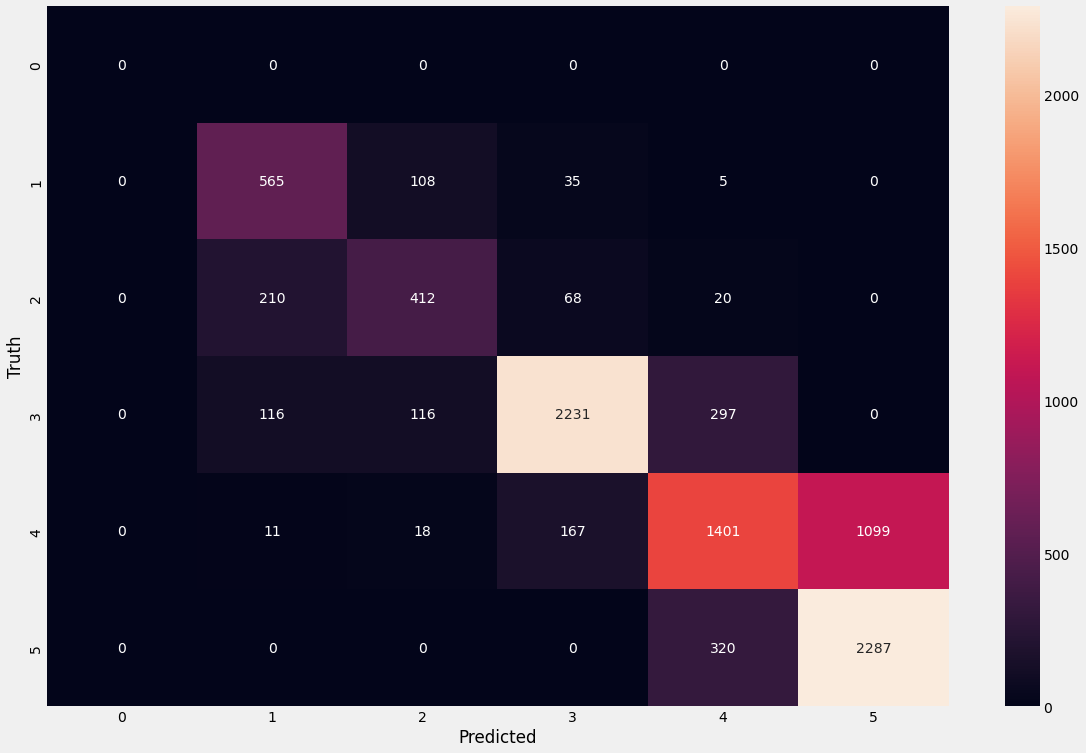

In [ ]:
y_pred = model.predict(ft_test_s)
y_pred_label = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = lb_test, predictions = y_pred_label)


import seaborn as sn

plt.figure(figsize = (18,12))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

score = 100 * f1_score(test, y_pred_label, average="macro")
print('Score: {}'.format(score))

In [ ]:
#renaming
lb_train_rep = np.array(pd.DataFrame(lb_train).replace({1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4}))
lb_test_rep = np.array(pd.DataFrame(lb_test).replace({1 : 0, 2 : 1, 3 : 2, 4 : 3, 5 : 4}))

In [ ]:
lb_train_cat = keras.utils.to_categorical(
    lb_train_rep, num_classes=5, dtype='float64'
)
lb_test_cat = keras.utils.to_categorical(
    lb_test_rep, num_classes=5, dtype='float64'
)

In [ ]:
model1 = keras.Sequential([
                          keras.layers.Dense(16, input_shape=(18,), activation='relu'),
                          keras.layers.Dense(12, input_shape=(18,), activation='relu'),
                          keras.layers.Dense(5, activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model1.fit(ft_train_s, lb_train_cat, epochs=1000)

Epoch 1/1000
692/692 [==============================] - 3s 3ms/step - loss: 1.2070 - accuracy: 0.4208
Epoch 2/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8843 - accuracy: 0.5220
Epoch 3/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8499 - accuracy: 0.5286
Epoch 4/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8241 - accuracy: 0.5564
Epoch 5/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.8043 - accuracy: 0.5882
Epoch 6/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.7880 - accuracy: 0.6007
Epoch 7/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.7718 - accuracy: 0.6073
Epoch 8/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.7548 - accuracy: 0.6082
Epoch 9/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.7382 - accuracy: 0.6128
Epoch 10/1000
692/692 [==============================] - 2s 2ms/step - loss: 0.724

In [ ]:
model1.evaluate(ft_test_s, lb_test_cat)

297/297 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7276


[0.4716632068157196, 0.7275985479354858]

Score: 69.38248250900155


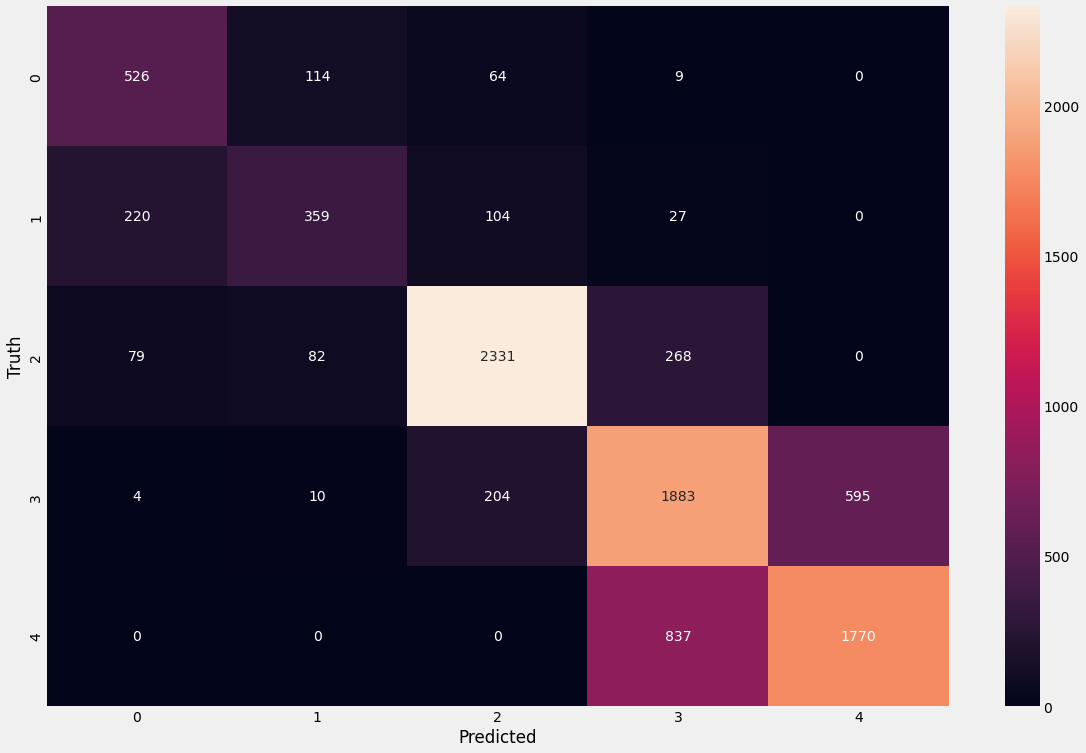

In [ ]:
y_pred1 = model1.predict(ft_test_s)
y_pred_label1 = [np.argmax(i) for i in y_pred1]
lb_test_cat_label = [np.argmax(i) for i in lb_test_cat]
cm1 = tf.math.confusion_matrix(labels = lb_test_cat_label, predictions = y_pred_label1)


import seaborn as sn

plt.figure(figsize = (18,12))
sn.heatmap(cm1, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

score = 100 * f1_score(lb_test_cat_label, y_pred_label1, average="macro")
print('Score: {}'.format(score))

In [ ]:
lb_test_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

### **Conclusion**


**Personally, I think the way the data was aggregated makes it difficult to identify which range of score depicts churning or not churning for instance 3 and above may represent churn and below not churn.**

**If simplified as above will make the model simple than rather sophosticated. Though it still depends on the usage of the model.** 

***

Still your humble Data Scientist and Petroleum Engineer,

Fabian Umeh,

Thank you.

#### **Using Pytorch**

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td